In [1]:
import matplotlib.pyplot as plt
import matplotlib.patheffects as PathEffects
from torch.utils.data import DataLoader

from decifer import (
    HDF5Dataset,
    Tokenizer,
)

# Example usage:
tok = Tokenizer()
block_size = 2048  # Transformer context length
dataset = HDF5Dataset('../data/chili100k/occ_debug_max_2000/hdf5/test_dataset.h5', 
                      ['name', 'xrd_cont_x', 'xrd_cont_y', 'xrd_discrete_x', 'xrd_discrete_y', 'xrd_tokenized', 'cif_tokenized', 'cif_content'], block_size)
dataloader = DataLoader(dataset, batch_size=32, shuffle=True)

Processing datasets:   0%|          | 0/8 [00:00<?, ?it/s]

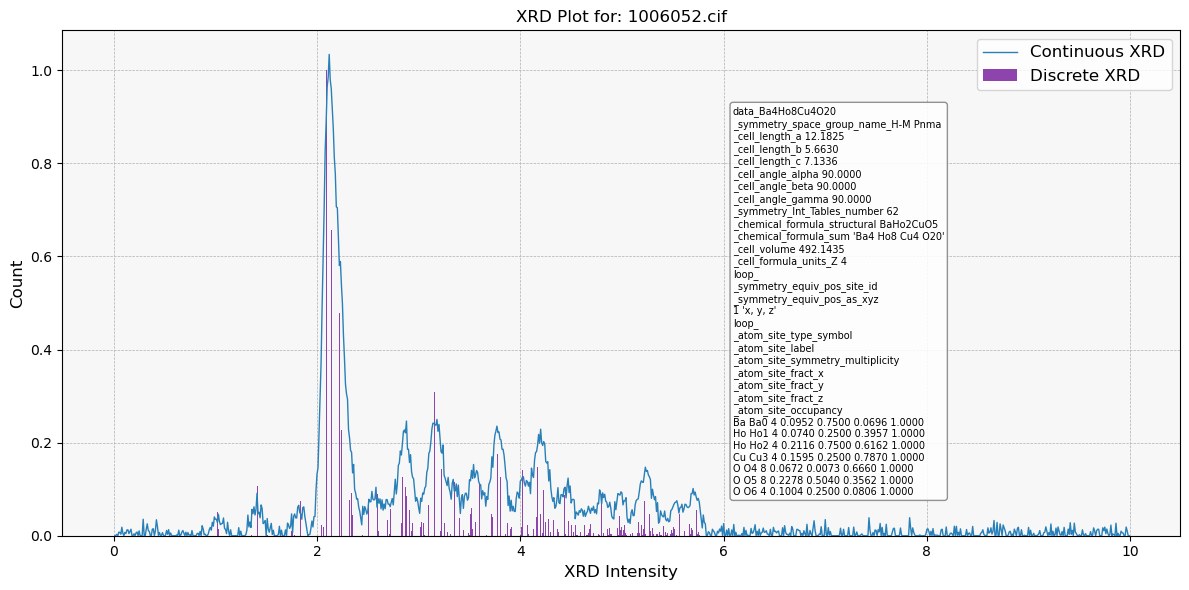

In [17]:
%matplotlib inline
for batch in dataloader:
    for i, (ni, x, y, xd, yd, xrd_tokens, cif_tokens, cif_content) in enumerate(zip(*batch)):
        
        # Debug max
        if i >= 1:
            break
        
        # Create a figure and axis with a clean style
        plt.figure(figsize=(12, 6))
        plt.title(f"XRD Plot for: {ni}", fontsize=12)

        # Style the plot with fancier colors and design
        plt.bar(xd, yd, width=0.01, color='#8e44ad', alpha=1, label='Discrete XRD', zorder=2)
        plt.plot(x[x != 0], y[x != 0], color='#2980b9', linewidth=1, alpha=1, label='Continuous XRD', zorder=3)

        # Add grid for better visibility
        plt.grid(True, which='both', axis='both', linestyle='--', linewidth=0.5, zorder=1)

        # Set labels for the axes
        plt.xlabel("XRD Intensity", fontsize=12)
        plt.ylabel("Count", fontsize=12)

        # Add a legend
        plt.legend(loc="upper right", fontsize=12)

        # Decode the tokens and plot them as text boxes
        xrd_tokens = xrd_tokens[xrd_tokens != tok.padding_id]
        decoded_xrd_tokens = tok.decode(list(xrd_tokens.numpy()))
        cif_tokens = cif_tokens[cif_tokens != tok.padding_id]
        decoded_cif_tokens = tok.decode(list(cif_tokens.numpy()))

        # Add the decoded tokens as textboxes
        text_box_props = dict(boxstyle="round,pad=0.3", edgecolor="gray", facecolor="white", alpha=0.85)
        plt.text(0.6, 0.85, decoded_cif_tokens,
                 transform=plt.gca().transAxes, fontsize=7, verticalalignment='top', bbox=text_box_props)

        # Enhance plot appearance with background color and styles
        plt.gca().set_facecolor("#f7f7f7")  # Light gray background

        plt.tight_layout()  # Ensure everything fits nicely
        plt.show()

    break


In [27]:
%matplotlib inline
for batch in dataloader:
    for i, (ni, x, y, xd, yd, xrd_tokens, cif_tokens, cif_content) in enumerate(zip(*batch)):
        print(cif_content)
                
        decoded_cif_tokens = tok.decode(list(cif_tokens.numpy()))
        print(decoded_cif_tokens.split("<pad>")[0])
        print("-"*10)


data_Ba2Mo4P4O24
_symmetry_space_group_name_H-M   P2_1/c
_cell_length_a   6.3830
_cell_length_b   7.1420
_cell_length_c   9.9530
_cell_angle_alpha   90.0000
_cell_angle_beta   95.4600
_cell_angle_gamma   90.0000
_symmetry_Int_Tables_number   14
_chemical_formula_structural   BaMo2(PO6)2
_chemical_formula_sum   'Ba2 Mo4 P4 O24'
_cell_volume   451.6726
_cell_formula_units_Z   2
loop_
_symmetry_equiv_pos_site_id
_symmetry_equiv_pos_as_xyz
1  'x, y, z'
2  '-x, -y, -z'
3  '-x, y+1/2, -z+1/2'
4  'x, -y+1/2, z+1/2'
loop_
_atom_site_type_symbol
_atom_site_label
_atom_site_symmetry_multiplicity
_atom_site_fract_x
_atom_site_fract_y
_atom_site_fract_z
_atom_site_occupancy
Ba  Ba0  2  0.0000  0.0000  0.0000  1.0000
Mo  Mo1  4  0.2763  0.0344  0.6749  1.0000
P  P2  4  0.2340  0.0515  0.3426  1.0000
O  O3  4  0.0413  0.5760  0.8124  1.0000
O  O4  4  0.2143  0.1626  0.4721  1.0000
O  O5  4  0.2376  0.6813  0.1039  1.0000
O  O6  4  0.2528  0.1747  0.2181  1.0000
O  O7  4  0.3243  0.5177  0.3412  1.00

data_Li2Ag4P6H4O20
_symmetry_space_group_name_H-M   P-1
_cell_length_a   7.5660
_cell_length_b   7.6020
_cell_length_c   8.4080
_cell_angle_alpha   72.6400
_cell_angle_beta   73.9100
_cell_angle_gamma   72.5300
_symmetry_Int_Tables_number   2
_chemical_formula_structural   LiAg2P3(HO5)2
_chemical_formula_sum   'Li2 Ag4 P6 H4 O20'
_cell_volume   430.8360
_cell_formula_units_Z   2
loop_
_symmetry_equiv_pos_site_id
_symmetry_equiv_pos_as_xyz
1  'x, y, z'
2  '-x, -y, -z'
loop_
_atom_site_type_symbol
_atom_site_label
_atom_site_symmetry_multiplicity
_atom_site_fract_x
_atom_site_fract_y
_atom_site_fract_z
_atom_site_occupancy
Li  Li0  2  0.0867  0.2870  0.3356  1.0000
Ag  Ag1  2  0.3344  0.5648  0.4011  1.0000
Ag  Ag2  2  0.4142  0.3067  0.9851  1.0000
P  P3  2  0.0999  0.7119  0.0929  1.0000
P  P4  2  0.2596  0.1752  0.6732  1.0000
P  P5  2  0.2632  0.7614  0.7315  1.0000
H  H6  2  0.2300  0.0200  0.1960  1.0000
H  H7  2  0.3100  0.0180  0.2900  1.0000
O  O8  2  0.0984  0.7851  0.8943  1.0

data_Na6As2
_symmetry_space_group_name_H-M   P6_3/mmc
_cell_length_a   4.8740
_cell_length_b   4.8740
_cell_length_c   8.5150
_cell_angle_alpha   90.0000
_cell_angle_beta   90.0000
_cell_angle_gamma   120.0000
_symmetry_Int_Tables_number   194
_chemical_formula_structural   Na3As
_chemical_formula_sum   'Na6 As2'
_cell_volume   175.1807
_cell_formula_units_Z   2
loop_
_symmetry_equiv_pos_site_id
_symmetry_equiv_pos_as_xyz
1  'x, y, z'
2  '-x, -y, -z'
3  'x-y, x, z+1/2'
4  '-x+y, -x, -z+1/2'
5  '-y, x-y, z'
6  'y, -x+y, -z'
7  '-x, -y, z+1/2'
8  'x, y, -z+1/2'
9  '-x+y, -x, z'
10  'x-y, x, -z'
11  'y, -x+y, z+1/2'
12  '-y, x-y, -z+1/2'
13  '-y, -x, -z+1/2'
14  'y, x, z+1/2'
15  '-x, -x+y, -z'
16  'x, x-y, z'
17  '-x+y, y, -z+1/2'
18  'x-y, -y, z+1/2'
19  'y, x, -z'
20  '-y, -x, z'
21  'x, x-y, -z+1/2'
22  '-x, -x+y, z+1/2'
23  'x-y, -y, -z'
24  '-x+y, y, z'
loop_
_atom_site_type_symbol
_atom_site_label
_atom_site_symmetry_multiplicity
_atom_site_fract_x
_atom_site_fract_y
_atom_site_fra

In [30]:
import sys

In [33]:
n = 0
for batch in dataloader:
    for i, (ni, x, y, xd, yd, xrd_tokens, cif_tokens, cif_content) in enumerate(zip(*batch)):
#         print(cif_content)
                
        decoded_cif_tokens = tok.decode(list(cif_tokens.numpy())).split('<pad>')[0]
        if len(decoded_cif_tokens) < 1:
            n += 1
            #print(tok.decode(list(cif_tokens.numpy())))
            #sys.exit(1)
        #print(decoded_cif_tokens.split("<pad>")[0])
        #print("-"*10)


In [37]:
n / (len(dataloader)*32)

0.14439655172413793

In [38]:
len(dataloader)*32

928

In [39]:
len(dataset)

902

In [42]:
928 - 0.14439655172413793*928

794.0